<a href="https://colab.research.google.com/github/gadamsravya/englishCharacterRecognation/blob/master/characterRecognistion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import csv
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

#tf.disable_v2_behavior()

%matplotlib inline
np.random.seed(1)

In [0]:
data_file= '/content/drive/My Drive/ Recognition of Characters/A_Z Handwritten Data (1).csv'
data = pd.read_csv(data_file, header=None)

In [0]:
data1=np.array(data)
img=np.array(data1[0,1:])

In [9]:
print(img)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  32 215 235  43   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 130 255 255 107   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  14 227 255 255 107   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 152 255 255 255 162   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  91 255 255 255 255 190   0   0   0   0   

In [0]:
img=np.reshape(img,(28,28))

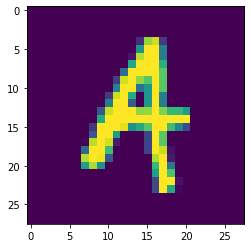

In [11]:
plt.imshow(img)
plt.show()

In [0]:
from tensorflow import keras
num_classes=26
img_size=28
num_images=data.shape[0]
def prepare(raw):
  y= raw[:,0]
  out_y=keras.utils.to_categorical(y, num_classes)

  X=raw[:,1:]
  out_x=np.reshape(X,(num_images,img_size,img_size,1))
  out_x=out_x/255

  return out_x, out_y



In [0]:
X, y= prepare(data1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout

char_recog= Sequential()
char_recog.add(Conv2D(20, kernel_size=(3,3), activation='relu', input_shape=(img_size,img_size,1)))
char_recog.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
char_recog.add(Flatten())
char_recog.add(Dense(100, activation='relu'))
char_recog.add(Dense(num_classes,activation='softmax'))

#Compiling the model

char_recog.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

#fit the model

char_recog.fit(X_train,y_train, batch_size=126, epochs=2, validation_split=0.2)

Epoch 1/2
1656/1656 [==============================] - 127s 76ms/step - loss: 0.1891 - accuracy: 0.9474 - val_loss: 0.0890 - val_accuracy: 0.9756
Epoch 2/2
1656/1656 [==============================] - 126s 76ms/step - loss: 0.0704 - accuracy: 0.9799 - val_loss: 0.0661 - val_accuracy: 0.9814


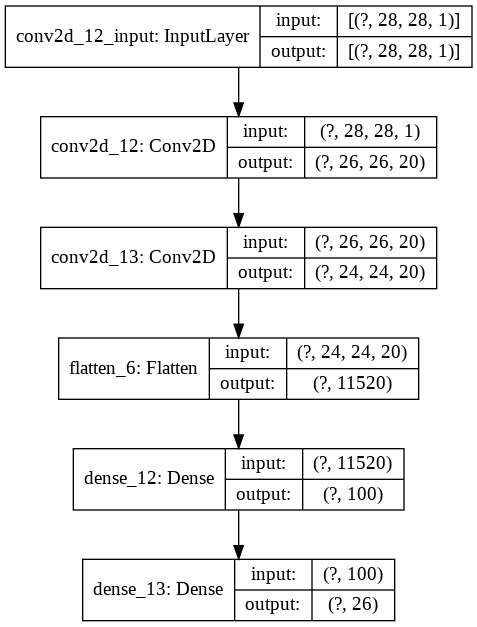

In [42]:
from tensorflow import keras
keras.utils.plot_model(char_recog, "my_first_model.png", show_shapes=True)

In [43]:
test_scores = char_recog.evaluate(X_test,y_test)

3492/3492 [==============================] - 27s 8ms/step - loss: 0.0630 - accuracy: 0.9827


In [44]:
print("Accuracy of the model:", test_scores[1])

Accuracy of the model: 0.9827092289924622
